# Diagnosing data science models using evaluation metics

## <center> [Central London Data Science Project Nights](https://www.meetup.com/central_london_data_science/)</center>

In this notebook we will start to build an intuition into how to use and analyse evaluation metrics with real data use cases.

**Lets get started!**

### Task
Run the cell below to load modules needed for tonights exercise.

In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import Image

# We can display plots in the notebook using this line of code
%matplotlib inline

### Set the scene

Your colleuge has just finshed coding up the first iteration of a new machine learning **classification** model. The product acts a prescreening procedure for disease detection based on a patients gene expression.

This model is crucial to the business and they've put you in charge of evaluation. ** *Yikes* **!

Never fear, we'll break down each step of the evaluation phase and deliver our insights.

### Task
Lets load in the results from the experiment our collegue ran.

In [2]:
initial_evaluation = pd.read_csv('task_1_data_meetup.csv')

In [3]:
initial_evaluation.head()

,predicted,expected
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


In the talk we've discussed that there are two ways to be right and two ways to be wrong with regards to binary classification:
* **True Positives**- Model predicts the **presence** of the disease, when the disease is **present** in a patient.
* **True Negatives**- Model predicts the **absence** of the disease, when the disease is **absent** in a patient.
* **False Positives**- Model predicts the **presence** of the disease, when the disease is **absent** from the patient.
* **False Negatives**- Model predicts the **absence** of the disease, when the disease is **present** in a patient.

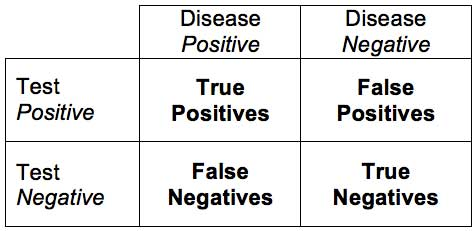

In [4]:
Image('tp_tn_fp_fn.jpg')

### Task
This function will help you retrieve the True positives, True negatives, False positives and False negatives from the experiment.

Complete the following code.

#### Remember!
* Disease **presence** is indicated by **1**.
* Disease **absence** is indicatred by **0**.

In [5]:
def get_TP_TN_FP_FN(df):
    
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    
    for i, row in df.iterrows():
        expected = row['expected']
        predicted = row['predicted']
        
        # True_postitives
        if predicted == 1 and expected == 1:
            true_positives+=1

        # True_negatives
        elif predicted == 0 and expected == 0:
            true_negatives+=1

        # False_positives
        elif predicted == 1 and expected == 0:
            false_positives+=1
        
        # False_negatives
        elif predicted == 0 and expected == 1:
            false_negatives+=1
        
    return true_positives, true_negatives, false_positives, false_negatives

In [6]:
true_positives, true_negatives, false_positives, false_negatives = get_TP_TN_FP_FN(initial_evaluation)
print('Number of true positives - {}'.format(true_positives))
print('Number of true negatives - {}'.format(true_negatives))
print('Number of false positives - {}'.format(false_positives))
print('Number of false negatives - {}'.format(false_negatives))

Number of true positives - 25
Number of true negatives - 41
Number of false positives - 24
Number of false negatives - 10


#### Expected output
* Number of true positives - 25
* Number of true negatives - 41
* Number of false positives - 24
* Number of false negatives - 10

We can also build our confusion matrix, be careful about the order in this one!

In [7]:
confusion_matrix = pd.crosstab(initial_evaluation['predicted'], initial_evaluation['expected'],
                               colnames=['Predicted'], rownames=['Expected'], margins=True)
confusion_matrix

Predicted,0,1,All
Expected,,,
0,41,10,51
1,24,25,49
All,65,35,100


### Metrics
Now we've tallied up our models scores lets gain insight by analysing the evaluation metrics!

### Task 
Let's calculate the **accuracy** of our model.

Here's the formula to help you out.

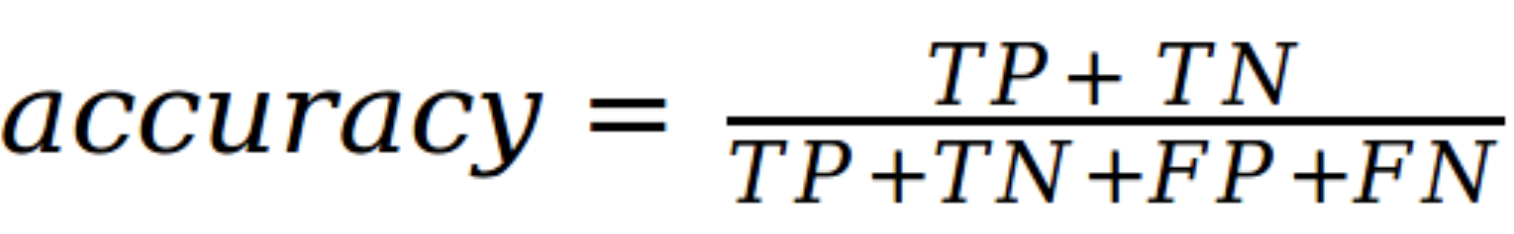

In [8]:
Image('accuracy.png')

In [9]:
def accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + TN + FP + FN)

In [10]:
accuracy_results = accuracy(true_positives, true_negatives, false_positives, false_negatives)
print('Model accuracy- {}'.format(accuracy_results))

Model accuracy- 0.66


#### Expected output:
* Model accuracy- 0.66

### Task
Relying on a single metric can be dangerous, let's introduce **recall**.

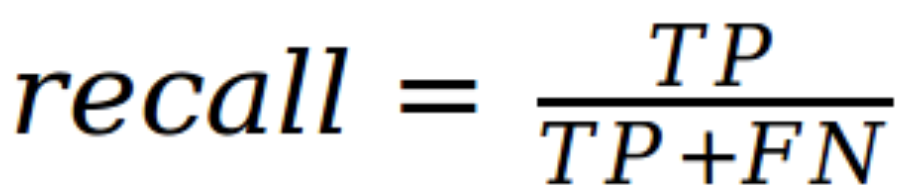

In [11]:
Image('recall.png')

In [12]:
def recall(TP, FN):
    return TP / (TP + FN)

In [13]:
recall_results = recall(true_positives, false_negatives)
print('Model recall- {}'.format(recall_results))

Model recall- 0.7142857142857143


#### Expected Output
Model recall- 0.7142857142857143


### Task
Lets see how the model fairs in terms of **precision**.

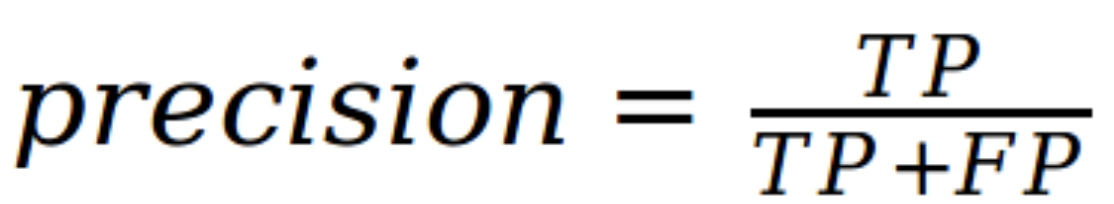

In [14]:
Image('precision.png')

In [15]:
def precision(TP, FP):
    return TP / (TP + FP)

In [16]:
precision_results = precision(true_positives, false_positives)
print('Model precision- {}'.format(precision_results))

Model precision- 0.5102040816326531


#### Expected output
* Model precision- 0.5102040816326531


### Task
Hmmmm not amazing, this is saying that the quality of predicts is kind of rubbish.

Let's see if our model performs well generally speaking, we'll use the **F1 score**.

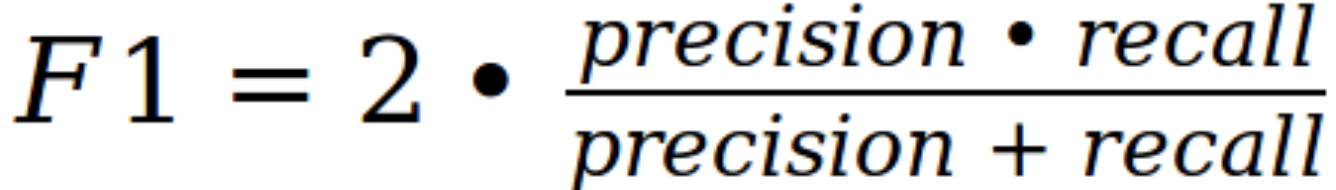

In [17]:
Image('f1.png')

In [18]:
def F1(precision_result, recall_result):
    return 2*(precision_result * recall_result) / (precision_result + recall_result)

In [19]:
f1_results = F1(precision_results, recall_results)
print('Model F1- {}'.format(f1_results))

Model F1- 0.5952380952380952


#### Expected output
Model F1- 0.5952380952380952

In [20]:
print('Summary')
print('Accuracy- {}'.format(accuracy_results))
print('Recall- {}'.format(recall_results))
print('Precision- {}'.format(precision_results))
print('F1 score- {}'.format(f1_results))

Summary
Accuracy- 0.66
Recall- 0.7142857142857143
Precision- 0.5102040816326531
F1 score- 0.5952380952380952


### Initial thoughts
Afer looking at the evaluation metrics we can see the initial model doesn't perform very well, we know that our problem requires **high recall**, maybe we can improve this metric as well as overall model performance.

You break the bad news to your collegue, they let out a big sigh and go back to the drawing board.

*Oh dear* :S

### Task
10 minutes later your collegue comes by your workstation with a big grin, "Best recall you'll ever see!" they state.

Fantastic! Lets pass the new predicted values into our evalation functions.

In [21]:
new_model_data = pd.read_csv('recall_data_meetup.csv')
true_positives, true_negatives, false_positives, false_negatives = get_TP_TN_FP_FN(new_model_data)


In [22]:
new_recall_results = recall(true_positives, false_negatives)
print('New model recall - {}'.format(new_recall_results))

New model recall - 1.0


#### Expected output
New model recall - 1.0


### Task
Looks great! 1!

**Best recall in the land!**

This is a bit *suspicious* though... 

Let's see how well the model performs with other metrics

In [23]:
new_precision_results = precision(true_positives, false_positives)
print('New model precision- {}'.format(new_precision_results))

New model precision- 0.39325842696629215


#### Expected output
New model precision- 0.39325842696629215


### Task
*Hmmmmm*, this looks strange, its **worse** than the original score.

Lets check out the **accuracy** and **F1 scores**.

In [24]:
new_accuracy_results = accuracy(true_positives, true_negatives, false_positives, false_negatives)
print('New model accuracy- {}'.format(new_accuracy_results))

new_F1_results = F1(new_precision_results, new_recall_results)
print('New model F1- {}'.format(new_F1_results))

New model accuracy- 0.46
New model F1- 0.564516129032258


Something is definitely wrong here.

Lets compare the old with the new

In [25]:
print('Old Summary')
print('Accuracy- {}'.format(accuracy_results))
print('Recall- {}'.format(recall_results))
print('Precision- {}'.format(precision_results))
print('F1 score- {}'.format(f1_results))

Old Summary
Accuracy- 0.66
Recall- 0.7142857142857143
Precision- 0.5102040816326531
F1 score- 0.5952380952380952


In [26]:
print('New_Summary')
print('Accuracy- {}'.format(new_accuracy_results))
print('Recall- {}'.format(new_recall_results))
print('Precision- {}'.format(new_precision_results))
print('F1 score- {}'.format(new_F1_results))

New_Summary
Accuracy- 0.46
Recall- 1.0
Precision- 0.39325842696629215
F1 score- 0.564516129032258


How could we get **perfect recall** with a **decrease in every other metric**.

Let's plot the predicted and expected results.

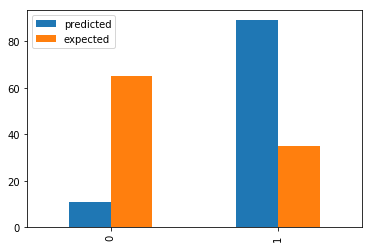

In [27]:
new_model_data.apply(pd.Series.value_counts).plot(kind='bar')

*Ahhh* do you see what's happened here?

It looks like the model has **predicted almost everything as a positive class 1**.

This would certainly increase the recall score, but in turn the model will make a lot of false postives which results in a decrease in accuracy and precision and ultimately a knock on effect of the F1 score.

**Mystery solved!**

Even though we should focus on recall, we should still build a model that has a general performance.

We relay this information back to our collegue and it's back to the whiteboard for a new model.

### Task
Next day our collegue comes up to you, bleary eyed- "I've cracked it! A generalised model".

You load up the experiment data and have another look. 

In [28]:
final_data = pd.read_csv('optimum_data_meetup.csv')

The previous night you read up on an easier way to generate the metrics, sklearn has a couple of API's that save you some time calculating the metrics.

Use the [link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to figure out how to use the metrics.

Hint- They all follow the same structure.

In [29]:
expected_values = final_data['expected']
predicted_values = final_data['predicted']

In [30]:
from sklearn.metrics import accuracy_score
final_idea_accuracy = accuracy_score(expected_values, predicted_values)
print('Final model accuracy- {}'.format(final_idea_accuracy))

Final model accuracy- 0.87


#### Expected output
Final model accuracy- 0.87


In [31]:
from sklearn.metrics import recall_score
final_idea_recall = recall_score(expected_values, predicted_values)
print('Final model recall- {}'.format(final_idea_recall))

Final model recall- 0.9428571428571428


#### Expected output
Final model recall- 0.9428571428571428


In [32]:
from sklearn.metrics import precision_score
final_idea_precision = precision_score(expected_values, predicted_values)
print('Final model precision- {}'.format(final_idea_precision))

Final model precision- 0.75


#### Expected output
Final model precision- 0.75

In [33]:
from sklearn.metrics import f1_score
final_idea_f1 = f1_score(expected_values, predicted_values)
print('Final model precision- {}'.format(final_idea_f1))

Final model precision- 0.8354430379746834


#### Expected output
Final model precision- 0.8354430379746834


In [34]:
from sklearn.metrics import classification_report
print(classification_report(expected_values, predicted_values))

             precision    recall  f1-score   support

          0       0.96      0.83      0.89        65
          1       0.75      0.94      0.84        35

avg / total       0.89      0.87      0.87       100



By using the classification report you can get the full story in a single line of code, this is a pretty powerful bit of code!

Looking at the classification report you can see your collegue has really out done themselves with this model. 

Just what the doctor ordered, the model shows greater performance in retreiving the the positive samples, exactly what we want.

This in turn cause a decrease in precision, but we knew there would be a trade off somewhere in the project.

** Congratulations, you've evaluated your first model! ** 

# Regression task
In this part of the notebook we will go through our next problem, regression.

The company has a fresh new problem, predicting the price of precious stones based on demand.

Your brainbox of a collegue has an initial idea and gets to work coding...

In [35]:
from sklearn.datasets import make_regression

In [79]:
n_samples = 200
X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=30,
                                      coef=True, random_state=0)

In [35]:
n_samples = 200
X_2, y_2, coef_2 = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=5,
                                      coef=True, random_state=0)

In [77]:
predictions = np.dot(coef, X)

In [38]:
reg_data = pd.DataFrame({'X': X.reshape(200,),
                         'predicted': predictions.reshape(200,),
                         'expected': y.reshape(200,)})
# reg_data.to_csv('regression_data_task-1.csv')

In [40]:
predictions_2 = np.dot(coef_2, X)

In [41]:
reg_data_2 = pd.DataFrame({'X': X_2.reshape(200,),
                         'predicted': predictions_2.reshape(200,),
                         'expected': y_2.reshape(200,)})
# reg_data_2.to_csv('regression_data_task-2.csv')

### Task
Load in the results from the initial experiments.

In [37]:
reg_data = pd.read_csv('regression_data_task-1.csv')

In [38]:
reg_data.head()

,X,expected,predicted
0,0.302472,-12.920366,29.095872
1,-1.270485,-169.450038,-122.212574
2,1.532779,126.660491,147.443609
3,-1.602058,-118.489628,-154.107754
4,1.139401,101.139043,109.603097


This is regression evalaution is similiar classification model, but instead of the answers being black and white we want to measure how ** *off* ** our model is.  

We can measure this by calculating the **difference** between the ** expected value** and the **predicted value**.

With this information you can plot how the model performs. 

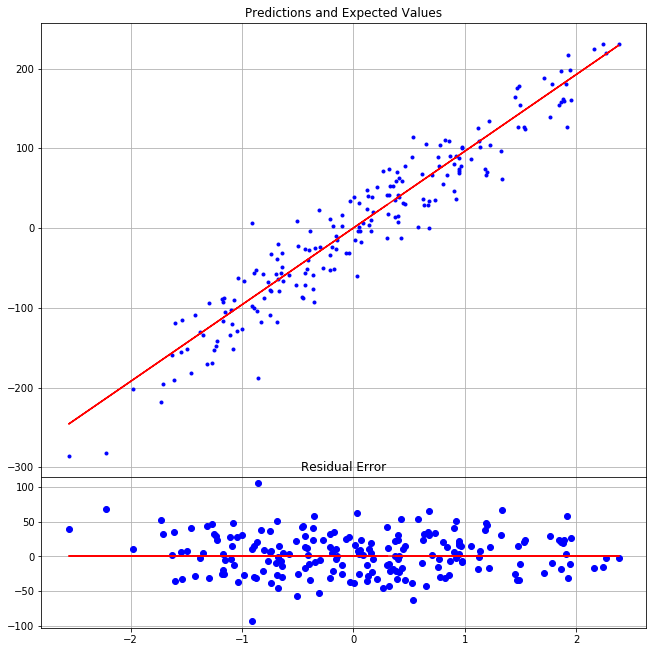

In [39]:
import numpy as np
from matplotlib import pyplot as plt

fig1 = plt.figure(1)
fig1.set_size_inches(10.5, 10.5)
frame1= fig1.add_axes((.1,.3,.8,.6))
plt.title('Predictions and Expected Values')
plt.plot(X, y,'.b') 
predictions = np.dot(X,coef)
plt.plot(X, predictions,'-r')
plt.grid()

#Calculate difference
difference = predictions.reshape(len(predictions),) - y.reshape(len(y),)

frame2=fig1.add_axes((.1,.1,.8,.2))
plt.title('Residual Error')
plt.plot(X, difference, 'ob')
plt.plot(X, [0]*len(predictions), 'r')
plt.grid()

### Initial summary
The top graph shows the predictions as a red line and the expected results as blue dots.

The bottom measure the **difference** between the predicted values and the expected values.

### Evaluation
Lets see how we can evaluate this regression model.

In [40]:
reg_predictions = reg_data['predicted']
reg_expected = reg_data['expected']

### Task
We'll first try Mean Absolute Error, which can be calculated like this...

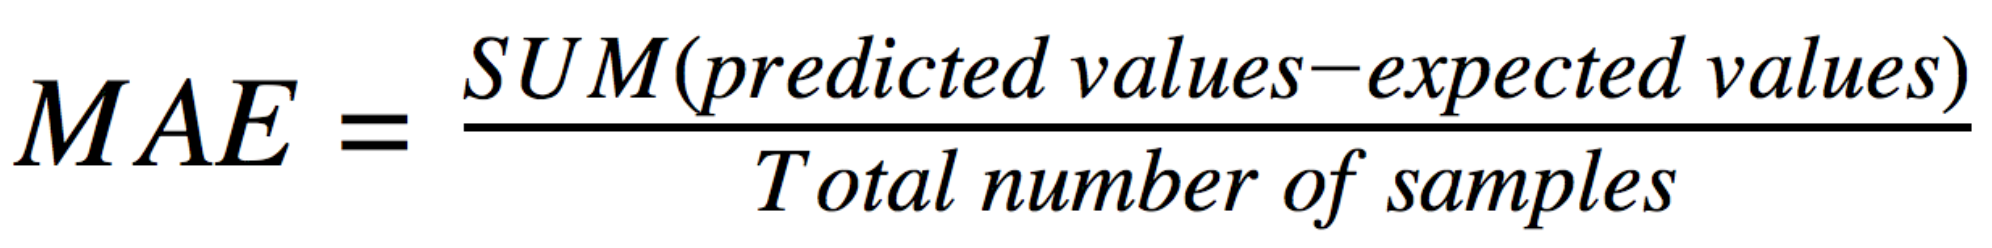

In [41]:
Image('MAE.png')

In [42]:
def MAE(prediction_values, expected_values):
    absolute_difference = abs(prediction_values-expected_values)
    return np.mean(absolute_difference)

In [43]:
mean_absolute_error_result = MAE(reg_predictions, reg_expected)
print('Model Mean Absolute Error- {}'.format(mean_absolute_error_result))

Model Mean Absolute Error- 24.140832477812015


### Expected output
Model Mean Absolute Error- 24.140832477812015


### Task

Lets try the Root mean square Error next.

This can be calculated as follows...

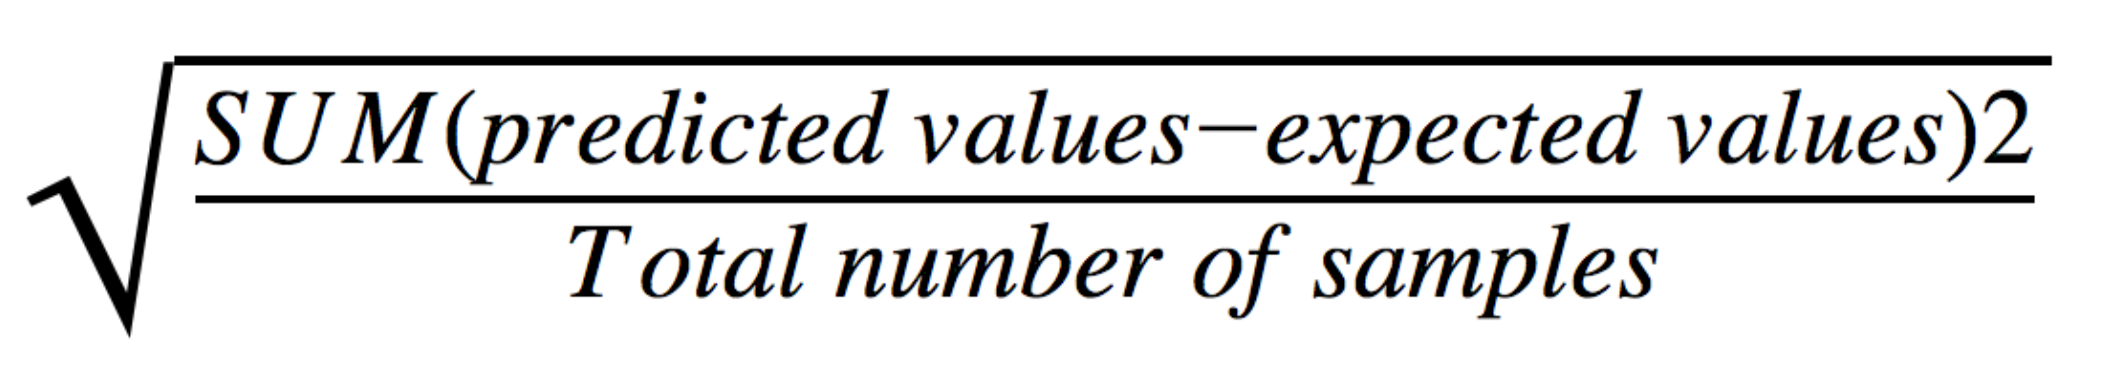

In [44]:
Image('RMSE.png')

In [45]:
def RMSE(prediction_values, expected_values):
    difference = prediction_values-expected_values
    squared_difference = difference**2
    squared_difference_mean = np.mean(squared_difference)
    return np.sqrt(squared_difference_mean)

In [46]:
root_mean_square_error_result = RMSE(reg_data['predicted'], reg_data['expected'])
print('Model Root Mean Square Error- {}'.format(root_mean_square_error_result))

Model Root Mean Square Error- 29.775840226608658


### Expected output
Model Root Mean Square Error- 29.775840226608658


So how can we tell if these metrics are good?

I'm glad you asked!

Let's take the Mean Absolute Error of 24.14 as an example. We can determine the magnitude of the error by looking at the expected values **distributions**.


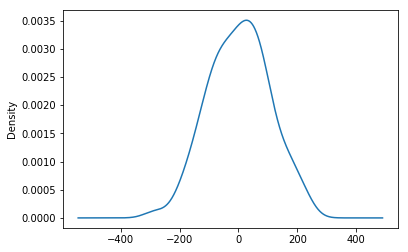

In [47]:
reg_expected.plot.density()

As you can see the majority of the expected values falls between -100 and +100, a window of approximately 200. 


### New Test data
The next day your boss gives you a brand new dataset to test your model on.

### Task
Let's load it up and perform some evaluations.

In [48]:
reg_data_2 = pd.read_csv('regression_data_task-2.csv')

In [49]:
new_reg_predicted = reg_data_2['predicted']
new_reg_expected = reg_data_2['expected']

In [50]:
new_mean_absolute_error_result = MAE(new_reg_predicted, new_reg_expected)
print('Model Mean Absolute Error- {}'.format(new_mean_absolute_error_result))

Model Mean Absolute Error- 14.388128610979503


#### Expected Output
Model Mean Absolute Error- 14.388128610979503


OK, our model has a smaller MAE, indicating that its a better model.

Amazing! Fly the flags, we've completed the project!

### Task
We'll just check the RMSE to be safe...

In [51]:
new_root_mean_square_error_result = RMSE(new_reg_predicted, new_reg_expected)
print('Model Root Mean Square Error- {}'.format(new_root_mean_square_error_result))

Model Root Mean Square Error- 45.413821640172124


#### Expected output
Model Root Mean Square Error- 45.413821640172124


** * Oh dear* **, that's not what we were expecting, our RMSE has shot through the roof.

How can our MAE drop by nearly half, yet have such a massive increase in RMSE?

Before we go any further have a think about what it could be...

/home/beast/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


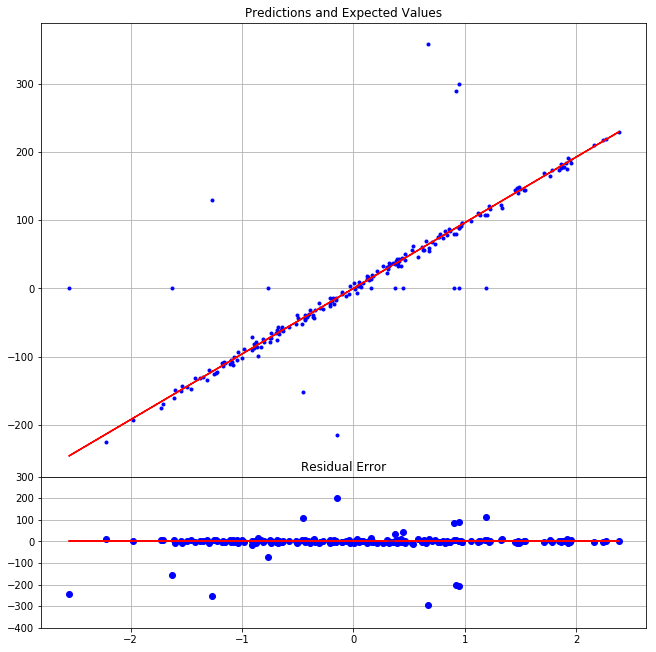

In [53]:
X_new = reg_data_2['X']
y_new = reg_data_2['expected']

fig2 = plt.figure(2)
fig2.set_size_inches(10.5, 10.5)
frame1= fig2.add_axes((.1,.3,.8,.6))
plt.title('Predictions and Expected Values')
plt.plot(X_new, new_reg_expected,'.b') 

# predictions_2 = np.dot(new_reg_predicted, coef_2)

plt.plot(X_new, new_reg_predicted,'-r')
plt.grid()

#Calculate difference
new_difference = new_reg_predicted.reshape(len(new_reg_predicted),) - y_new.reshape(len(new_reg_expected), )

frame2= fig2.add_axes((.1,.1,.8,.2))
plt.title('Residual Error')
plt.plot(X_new, new_difference, 'ob')
plt.plot(X_new, [0]*len(X_new), 'r')
plt.ylim(-400, 300)
plt.grid()

### Summary
Ah there it is! Can you see them? Look at the blue dots that are much further away from the red line in comparision to the others. These are called **outliers** are the bane of RMSE's life.

If we think back to how we calculate RMSE, you'll remember it's **indiffernt to the direction**, it only cares about the **maginitude of the error**. 

How RMSE gets around its indifference to direction (whether the model undershoots or overshoots a prediction), is by **squaring** the differences.

* If we square two positives- we get a **positive**
* If we square two negatives- we get a **positive**

The down side to squaring is that it will **amplify** the magnitude of the error.

This means that if we have **unexpected expected values** (outliers) our metric will hold the model much more accountable for the mistakes than if we used the Mean Absolute Error. 

### Outlier investigation

Lets do a quick analysis on the outliers and then remove them.

There's a suspicious number of expected values around 0, maybe our sensors were broken that day. (We should probably look into this as a separate issue). 



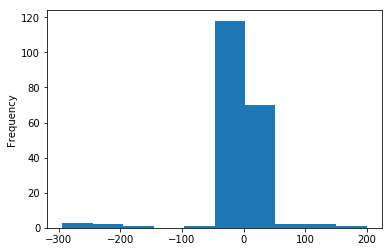

In [54]:
new_difference.plot.hist()

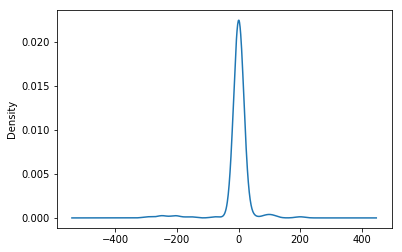

In [55]:
new_difference.plot.density()

OK cool, looks like our errors follow standard distribution.

With only a handful falling outside approximately **2 standard deviations** from the **normal**.

### Task
Run this cleaning function to remove outliers.

In [56]:
# add column for difference to dataframe
reg_data_2['difference'] = new_difference

def remove_outliers(df):
    # Calculate mean of differences
    mean = np.mean(df['difference'])
    
    # Calculate standard deviations of differences
    sd = np.std(df['difference'])
    
    # Filtering out values 2 standard deviations away from both sides of the mean.
    upper_removed = df[df['difference'] > mean - 2 * sd]
    df = upper_removed[upper_removed['difference'] < mean + 2 * sd]
    return df


In [57]:
outliers_removed_data = remove_outliers(reg_data_2)

/home/beast/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


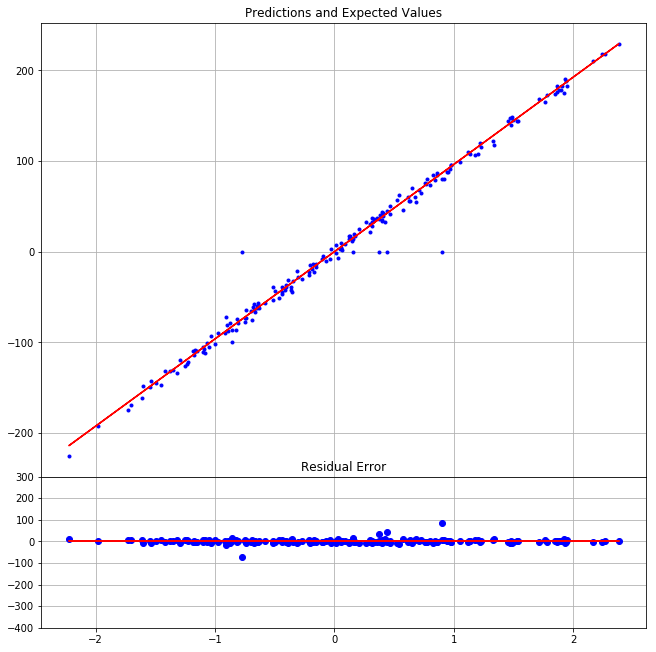

In [61]:
X_clean = outliers_removed_data['X']
y_clean = outliers_removed_data['expected']
predictions_clean = outliers_removed_data['predicted']

fig3 = plt.figure(2)
fig3.set_size_inches(10.5, 10.5)
frame1= fig3.add_axes((.1,.3,.8,.6))
plt.title('Predictions and Expected Values')
plt.plot(X_clean, y_clean,'.b') 

plt.plot(X_clean, predictions_clean,'-r')
plt.grid()

#Calculate difference
difference_clean = predictions_clean.reshape(len(predictions_clean),) - y_clean.reshape(len(y_clean),)

frame2= fig3.add_axes((.1,.1,.8,.2))
plt.title('Residual Error')
plt.plot(X_clean, difference_clean, 'ob')
plt.plot(X_clean, [0]*len(X_clean), 'r')
plt.ylim(-400, 300)
plt.grid()

### Summary
Looks better! There's a few expected values still at zero. This could be a problem with our sensors. 

Let's treat these as outliers and remove them.

We should also let someone on the engineering team know that some of the sensors could be broken.

### Task
Complete the function to remove all 0 values from expected column. 

Here's the dataset you will be cleaning.

In [62]:
outliers_removed_data.head()

,X,expected,predicted,difference
0,0.302472,22.093166,29.095872,7.002706
2,1.532779,143.979756,147.443609,3.463853
3,-1.602058,-148.171400,-154.107754,-5.936354
4,1.139401,108.192421,109.603097,1.410676
5,-0.509652,-39.418563,-49.025297,-9.606735


In [63]:
def remove_0_outliers(df):
    return df[df['expected']!=0]

In [64]:
cleaned_data = remove_0_outliers(outliers_removed_data)
cleaned_data[cleaned_data['expected']==0]

,X,expected,predicted,difference


In [65]:
### Expected output
cleaned_data[cleaned_data['expected']==0]

,X,expected,predicted,difference


### Task
Let's run it through the visualization code to see if we've removed the potential outliers.

/home/beast/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


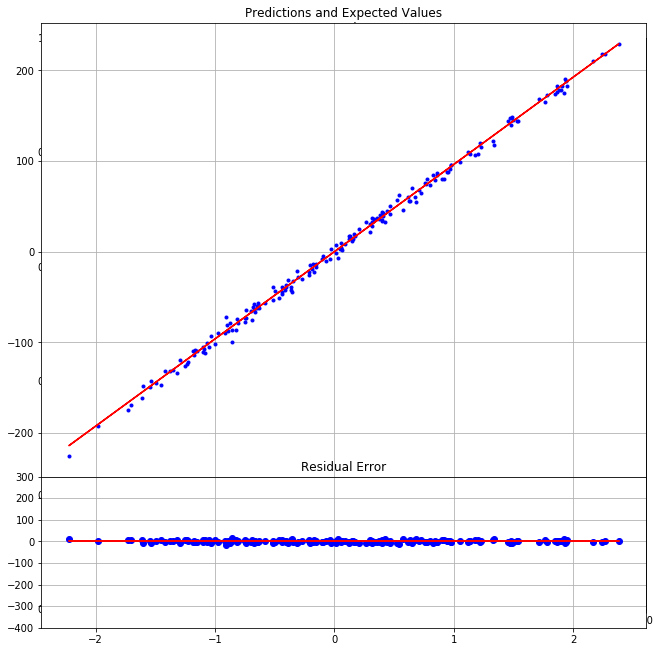

In [67]:
X_clean = cleaned_data['X']
y_clean = cleaned_data['expected']
predictions_clean = cleaned_data['predicted']

fig3 = plt.figure(2)
plt.title('ok')
fig3.set_size_inches(10.5, 10.5)
frame1= fig3.add_axes((.1,.3,.8,.6))
plt.title('Predictions and Expected Values')
plt.plot(X_clean, y_clean,'.b') 

plt.plot(X_clean, predictions_clean,'-r')
plt.grid()

#Calculate difference
difference_clean = predictions_clean.reshape(185,) - y_clean.reshape(185,)

frame2= fig3.add_axes((.1,.1,.8,.2))
plt.title('Residual Error')
plt.plot(X_clean, difference_clean, 'ob')
plt.plot(X_clean, [0]*185, 'r')
plt.ylim(-400, 300)
plt.grid()

### Summary
Looks good! Seems to be no outliers in the dataset.

We'll perform our evalutation metrics for the final time.

### Task
Calculate the [Mean Absolute Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) using the metric API from Sklearn.

In [68]:
clean_predicted = cleaned_data['predicted']
clean_expected = cleaned_data['expected']

In [69]:
from sklearn.metrics import mean_absolute_error
cleaned_mean_absolute_error_result = mean_absolute_error(clean_predicted, clean_expected)
print('Model Mean Absolute Error- {}'.format(cleaned_mean_absolute_error_result))

Model Mean Absolute Error- 4.068437513183244


### Expected Output
Model Mean Absolute Error- 4.068437513183244


### Task
Calculate the Root Mean Square Error using [Sklearn's API](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

Hint- There's one step missing from Sklearn's API.



In [70]:
from sklearn.metrics import mean_squared_error

cleaned_mean_square_error_result = mean_squared_error(cleaned_data['predicted'], cleaned_data['expected'])
cleaned_root_mean_square_error_result = np.sqrt(cleaned_mean_square_error_result)
print('Model Root Mean Square Error- {}'.format(cleaned_root_mean_square_error_result))

Model Root Mean Square Error- 4.996702645425557


### Expected output
Model Root Mean Square Error- 4.996702645425557


The RMSE has dropped conciderably,** *phew* **.

### Congratulations!
So thats the end of the tutorial, I hope had a bit of fun calculating, evaluating and appreciating evaluation metrics.

If you have some more time, see if you can build a linear model for these datasets.

**Remember to ask yourself what kind of metrics best suit your problem**.
Will you want a model thats optimized for gather a certain class or being super exclusive in its choices? Is the evaluation data messy and full of outliers?

# Optional Task
You've been given the problem of **detecting fraudulent banknotes**. You come across a dataset detailing image sensor data for banknotes. 

Let's see if we can build a model that detects if a banknote is fraudulent. 

More information can be found [here](https://archive.ics.uci.edu/ml/datasets/banknote+authentication).

In [73]:
banknotes_data = pd.read_csv('banknotes_X.csv')
banknotes_labels = pd.read_csv('banknotes_y.csv')

In [74]:
from sklearn.model_selection import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(banknotes_data, banknotes_labels, test_size=0.33, random_state=420)

In [87]:
from sklearn.linear_model import LogisticRegression
### Code here

# Optional Task
This project requires your team to build a model aiming to understand the underlying relationship between patient attributes and progression of diabetes.

Sklearn already provides us with this data.

Check out this [link](http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) for more information.


In [105]:
from sklearn.datasets import load_diabetes
data_diabetes = load_diabetes()
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data_diabetes['data'], data_diabetes['target'], test_size=0.33, random_state=420)

In [76]:
from sklearn.linear_model import LinearRegression
### code here